#Task-3
##Customer Purchase Prediction using Decision Tree Classifier

In [11]:
import pandas as pd
df = pd.read_csv("bank.csv", sep=";")
df.shape

(45211, 17)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.drop("y", axis=1)   # Input
y = df["y"]                # Output

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8713922370894615
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



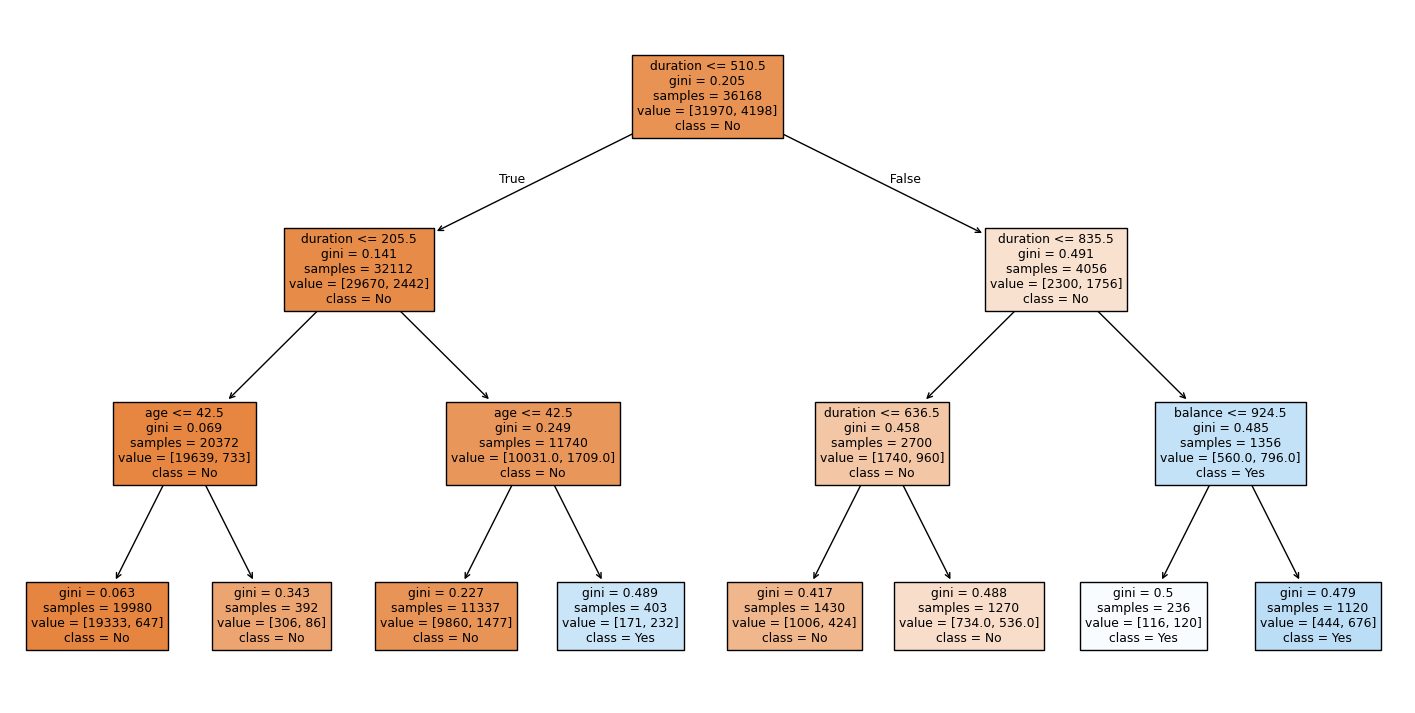

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

imp = pd.Series(model.feature_importances_, index=X.columns)
top3 = imp.sort_values(ascending=False).head(3).index

X_small = X[top3]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y, test_size=0.2, random_state=42
)

small_model = DecisionTreeClassifier(max_depth=3)
small_model.fit(X_train_s, y_train_s)

plt.figure(figsize=(18,9))
plot_tree(small_model,
          feature_names=X_small.columns,
          class_names=["No","Yes"],
          filled=True)
plt.savefig("final_decision_tree.pdf")
plt.show()

#🔹 Conclusion
A Decision Tree model was used to predict whether a customer will purchase a product or service. The model achieved an accuracy of about 87%, showing that it can effectively identify customer purchasing behavior. This project demonstrates how machine learning can help businesses make better marketing decisions.